## Pré configurações 
Antes de iniciar o processamento e treinamento do modelo no YoloV8 para detecção de rachaduras, é necessário garantir que a GPU está sendo usada. Usa-se o comando !nvidia-smi para isso. Se for necessário, vá em `Editar` -> `Configurações de notebook` -> `Acelerador de hardware`, e mude para `GPU` e salve.


In [1]:
!nvidia-smi

Sun May 28 02:14:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Esse trecho do código importa a biblioteca `os` que permite acessar arquivos e repositórios e o método `getcwd` retorna o repositório atual.


In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


Instalação da biblioteca ultralytics para treinar o modelo de detecção de objetos em imagens com o Yolo V8.

In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.4/591.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 24.3 MB/s eta 0:00:00


## Importação do YOLO e bibliotecas para visualização de imagens.


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Treinando o modelo

Esse trecho de código cria um repositório chamado datasets, e posteriormente instala a biblioteca roboflow onde o dataset com imagens para o treinamento do modelo está armazenado e tratado.


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lNYbU1SzhTm0CpXxEaav")
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.109, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:02<00:00, 3686.16it/s]


Aqui é onde acontece o treinamento a partir do `yolov8s.pt` que é um modelo de detecção de objetos pré-treinado. São feitas 10 épocas de treinamento do modelo para a melhor otimização deste.


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 382MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/crack-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685240141.7ffd8ded998e.1713.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


Plotando a matriz de confusão do modelo.


/content


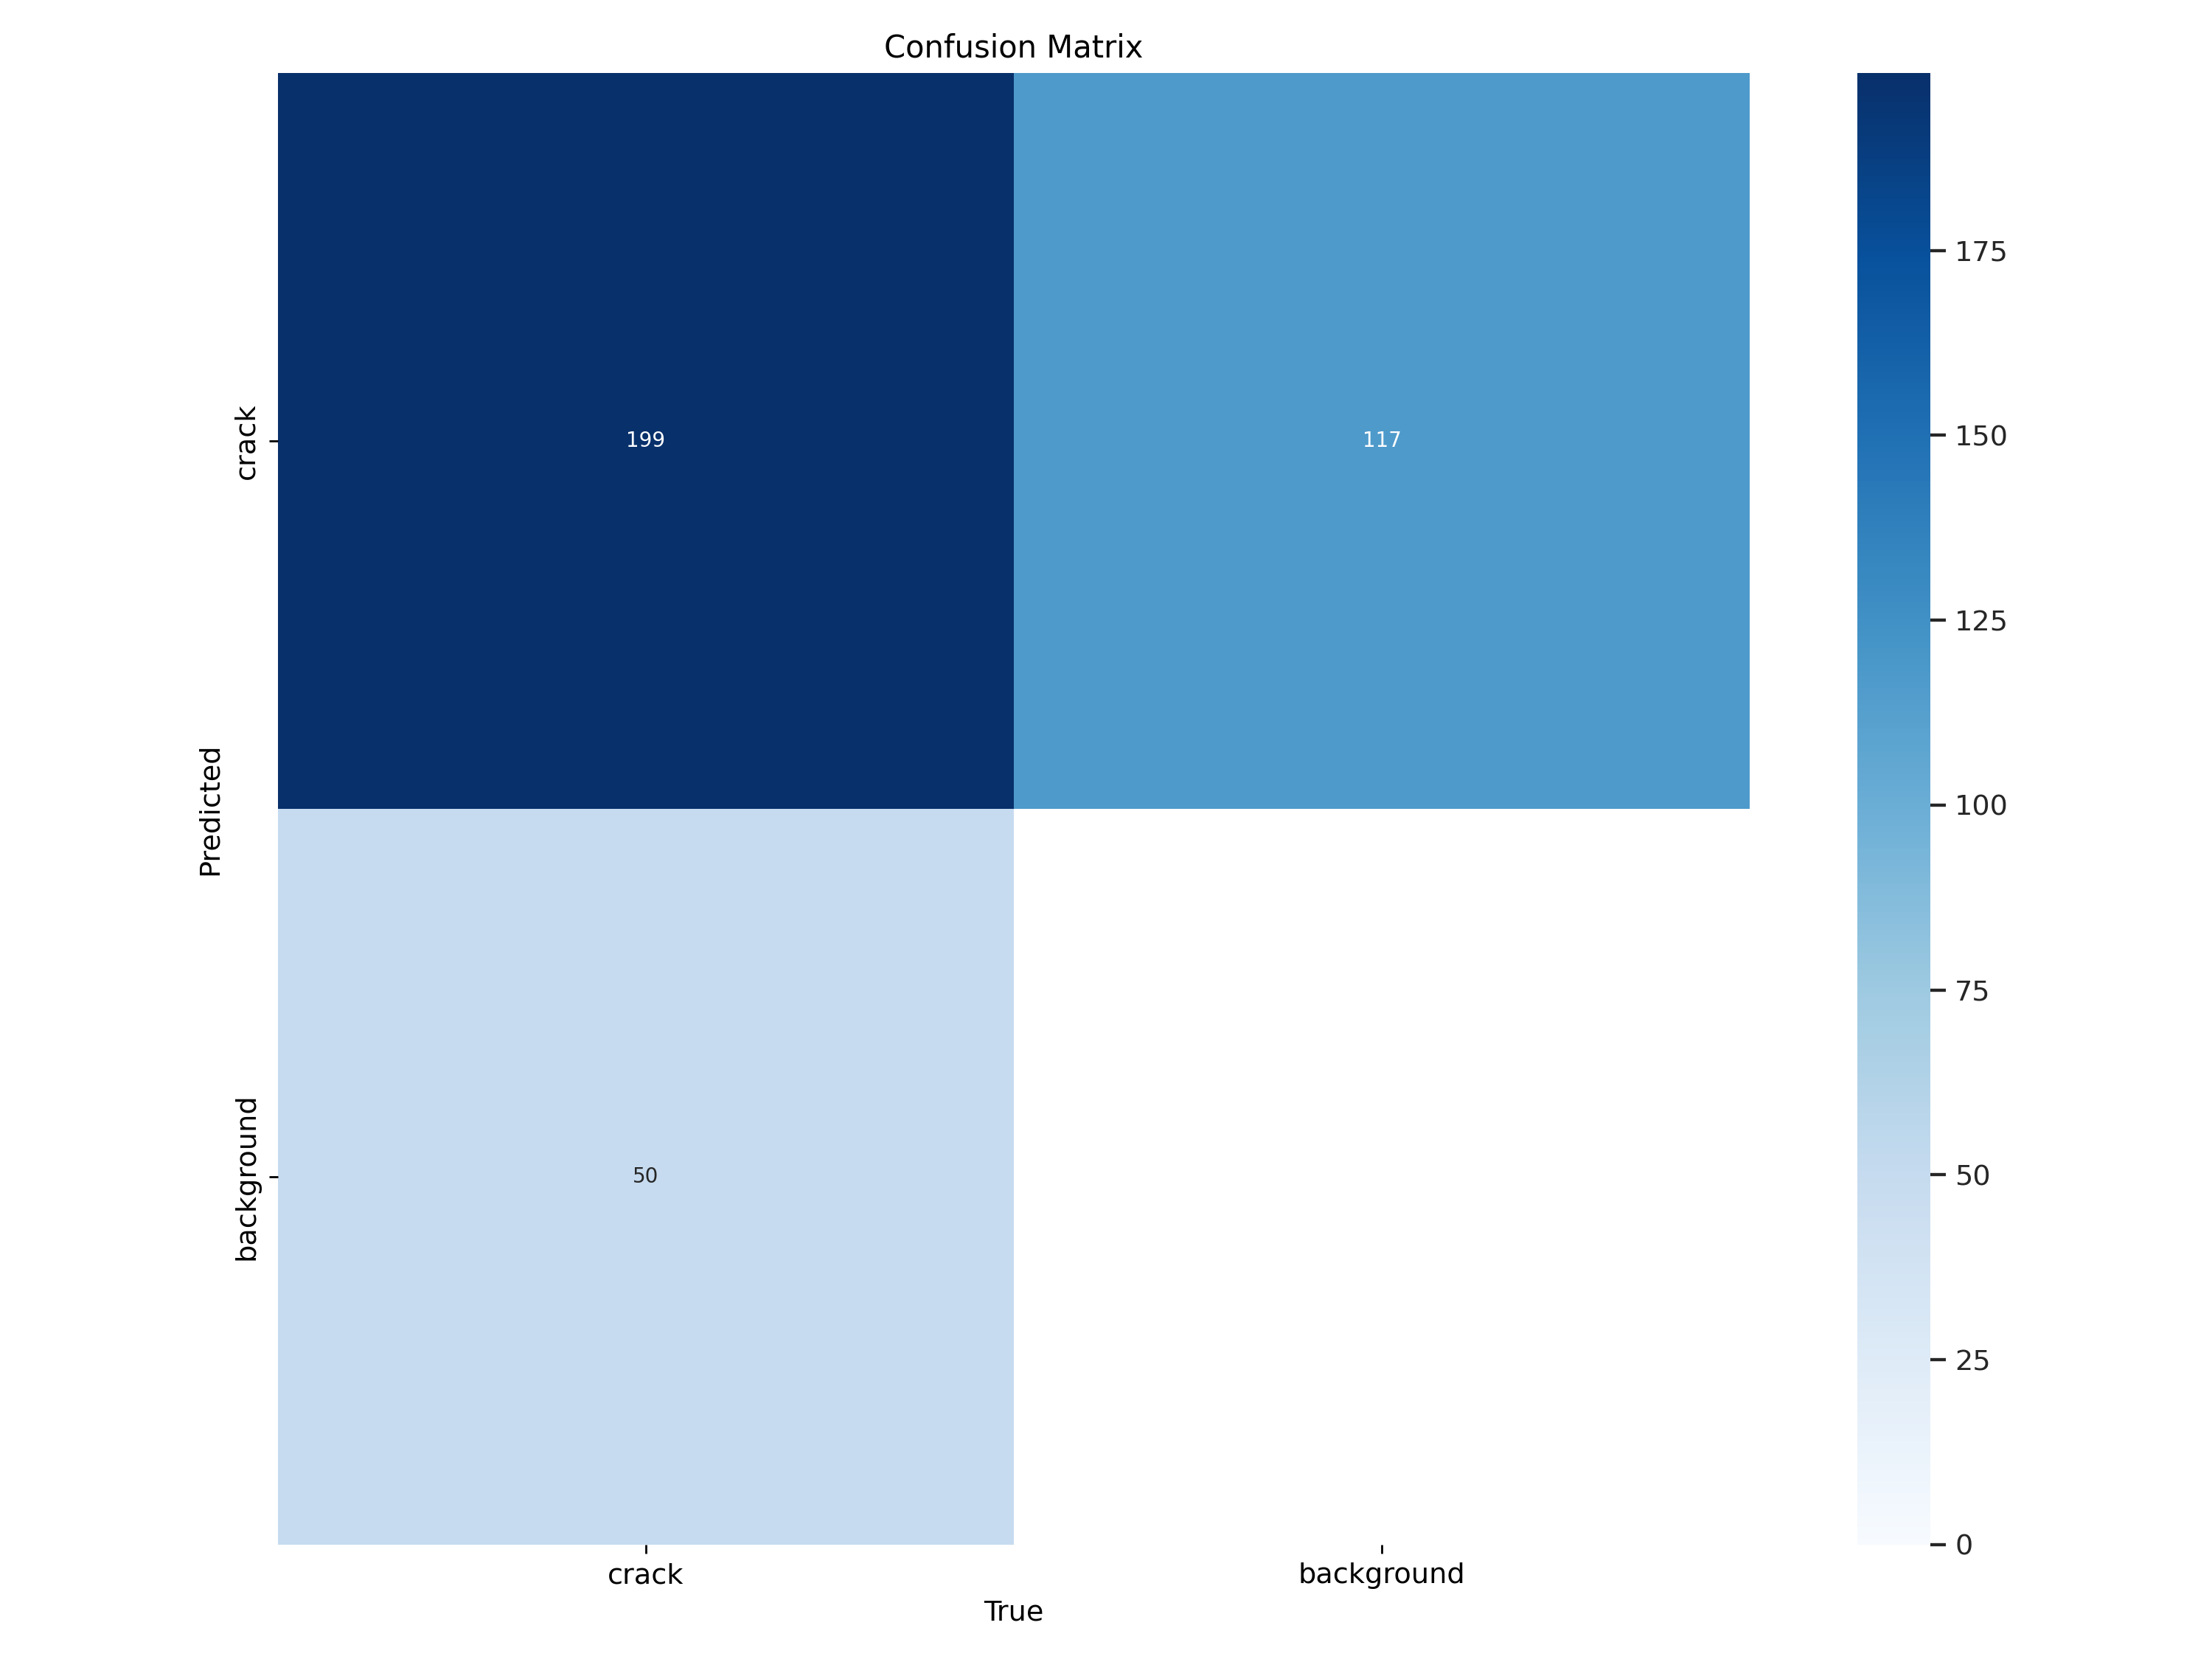

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


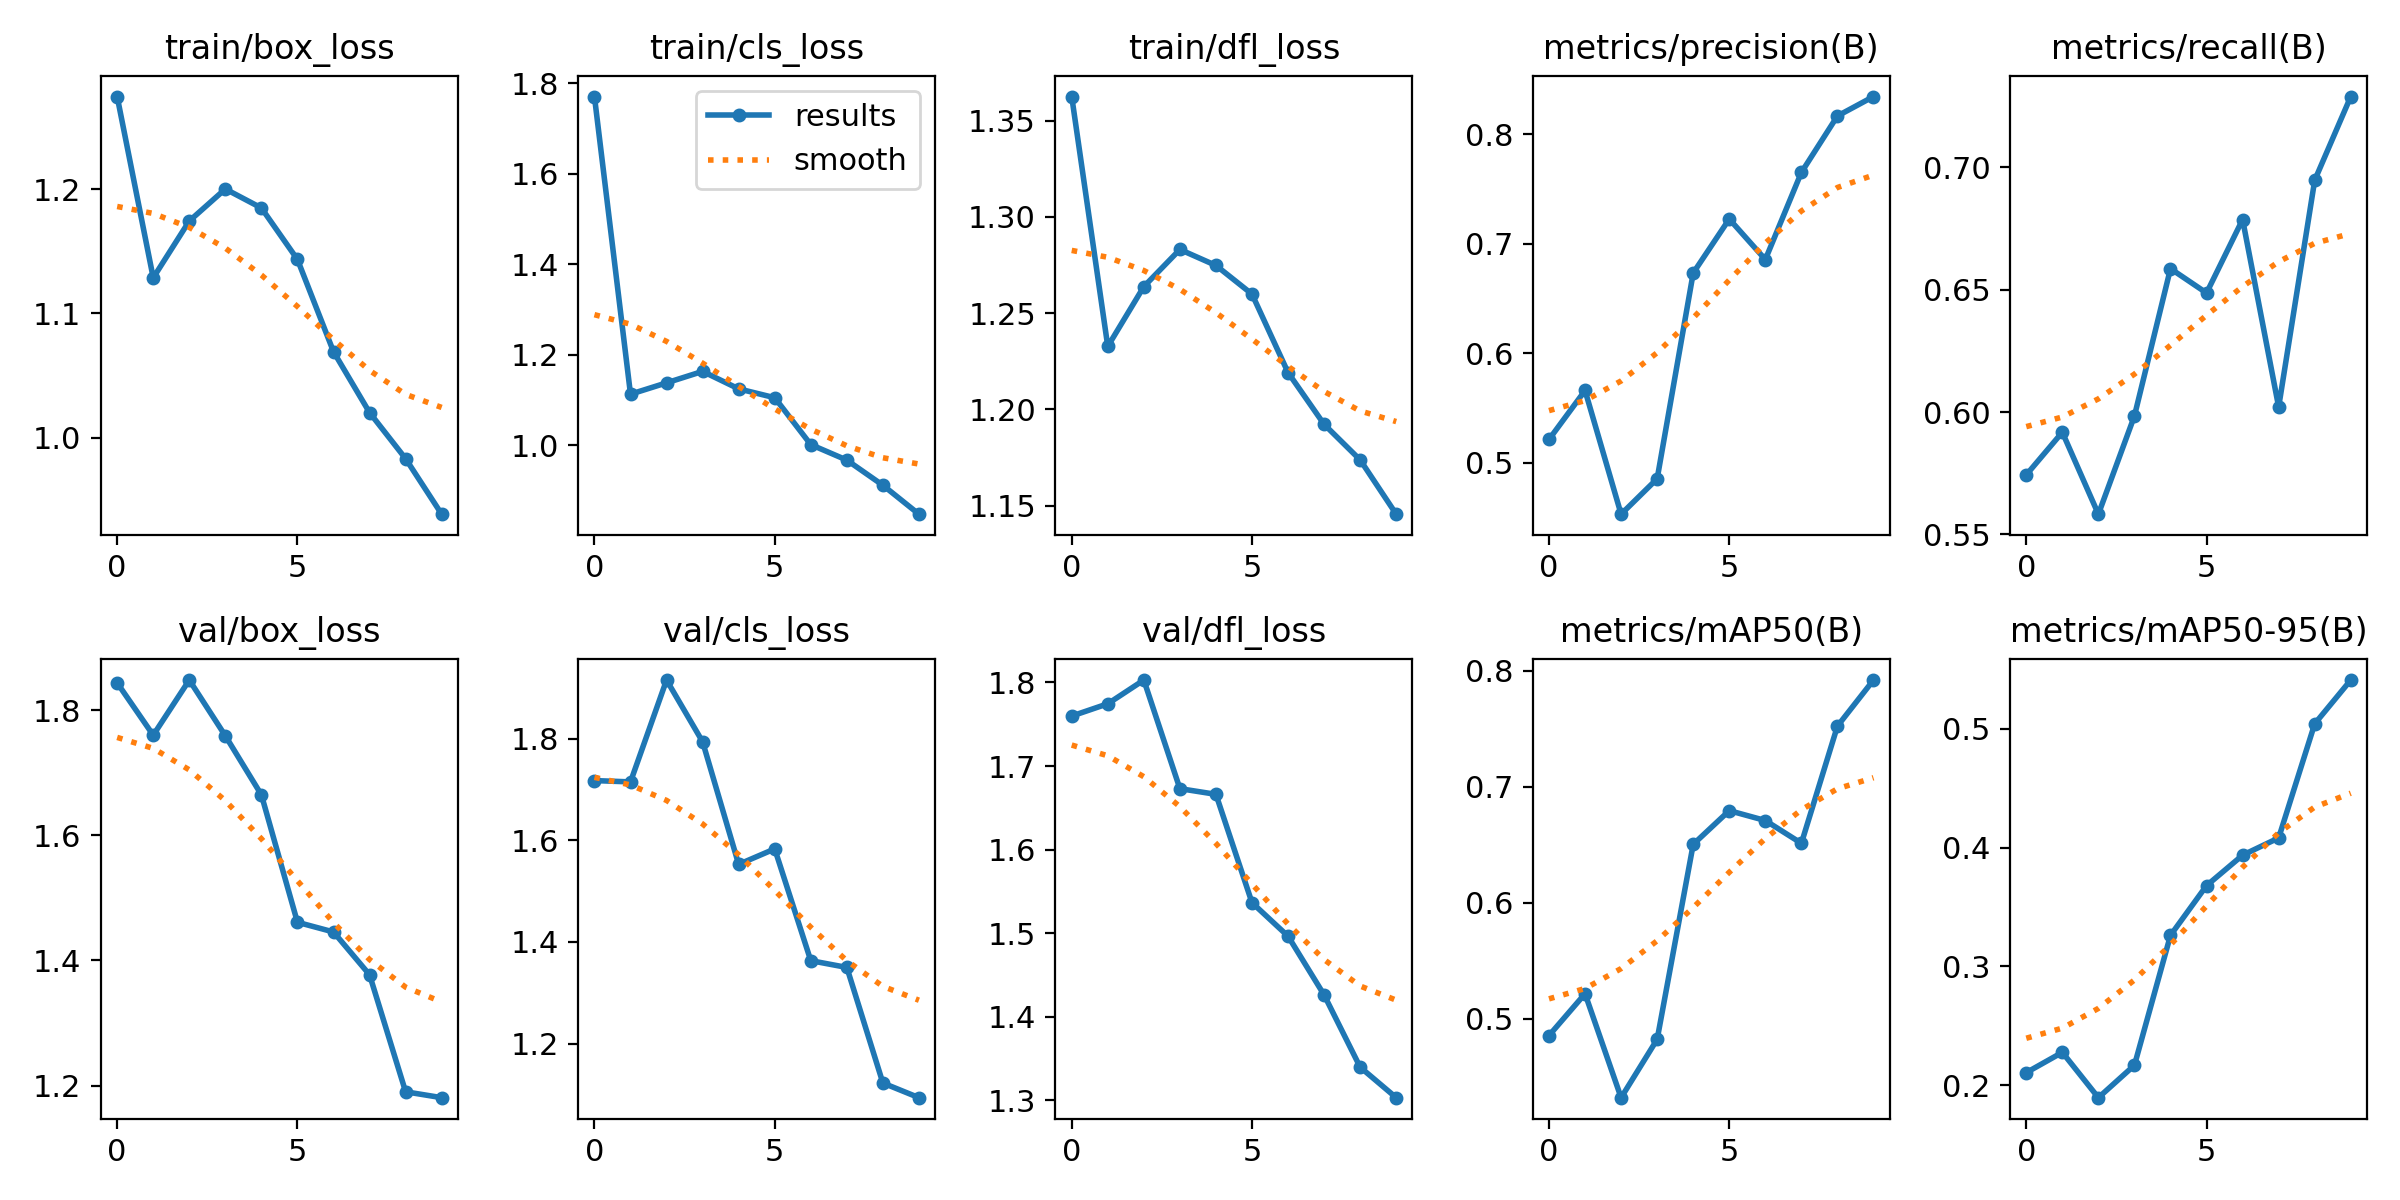

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Mostrando algumas imagens detectando rachaduras a partir do treinamento do modelo.

/content


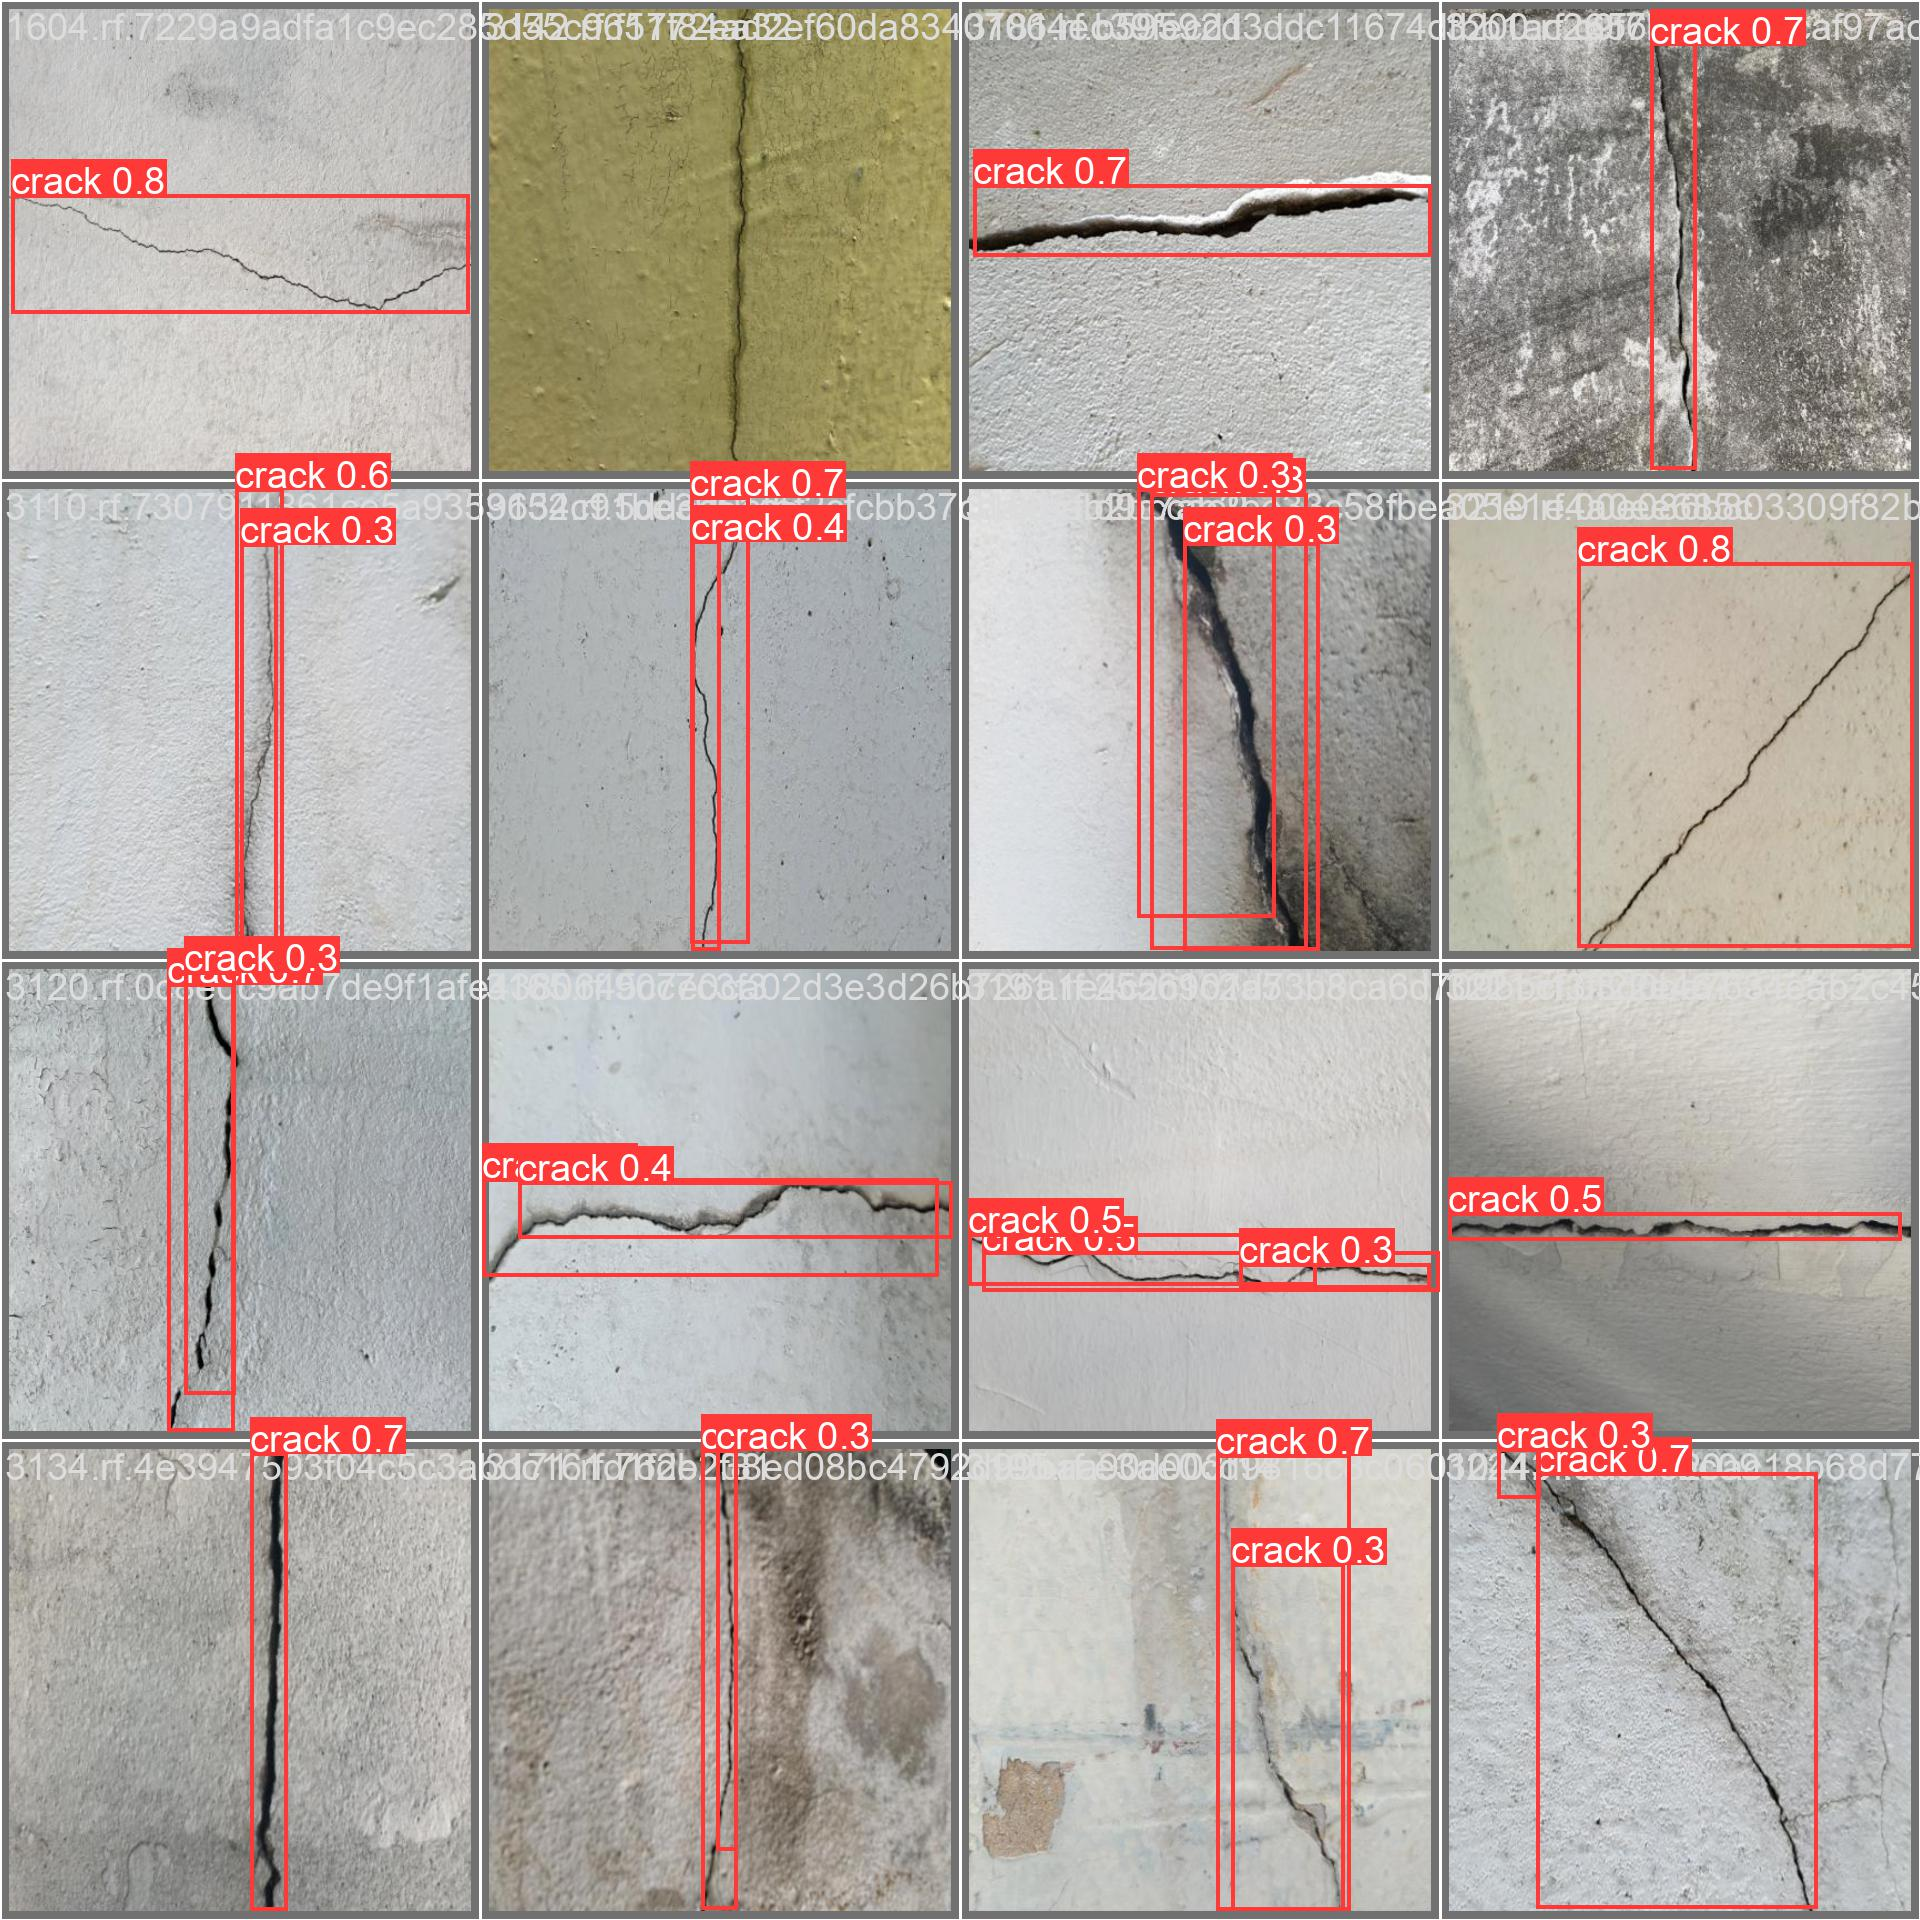

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/crack-2/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:07<00:00,  1.78it/s]
                   all        200        249      0.834      0.726      0.792      0.542
Speed: 4.5ms preprocess, 14.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val


Inferência dos resultados do novo modelo. O arquivo binário `best.pt` contém o novo modelo treinado.

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/112 /content/datasets/crack-2/test/images/1616.rf.c868709931a671796794fdbb95352c5a.jpg: 800x800 2 cracks, 24.6ms
image 2/112 /content/datasets/crack-2/test/images/1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg: 800x800 3 cracks, 24.6ms
image 3/112 /content/datasets/crack-2/test/images/1686.rf.809fb1b51c607e5cf787e44ef4ddd7b8.jpg: 800x800 1 crack, 24.5ms
image 4/112 /content/datasets/crack-2/test/images/1706.rf.011d213c21ec78896c36728dcbc156f5.jpg: 800x800 (no detections), 24.6ms
image 5/112 /content/datasets/crack-2/test/images/1716.rf.85ea38b36008beaa72c5d8541f734eb0.jpg: 800x800 2 cracks, 20.4ms
image 6/112 /content/datasets/crack-2/test/images/1722.rf.38b38f2e833309a4f35bfbf0432dffff.jpg: 800x800 3 cracks, 19.4ms
image 7/112 /content/datasets/crack-2/test/images/1794.rf.7a03ca09d05e9e2941f768bc8570cb54.jpg: 800x80

Olhando para alguns resultados da detecção de rachaduras do modelo.

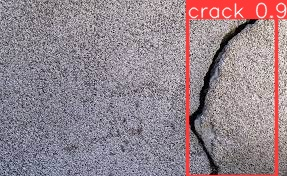

In [26]:
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/runs/detect/predict/download.jpeg save=True
display(Image(filename="/content/runs/detect/predict2/download.jpeg", width=600))
print("\n")